<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 3</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 17, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Man Tik Li


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of handling with external data in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be either 11 or 12 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write good comments. 
2. Be consistent on naming conventions.  
3. Put a blank space before and after every operator. 
4. When breaking up a long line, break it before an operator, not after. 


### G. Data Sets

This assignment needs the data sets specified in the questions. 

### H. Answer the following questions

#### Question 1:

Wikipedia has a Webpage: [List of countries by past and future population](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population). On this page, there are three tables containing the estimated populations from 1950 to 2050 for all the countries. Read the description on the Webpage to understand the information in the tables. Complete the steps below.
- Download the Webpage as an HTML file in your disk. 
- Read in the tables using Pandas' `read_html` method. Answer the following question:
 * How many tables have you read in?
- Show the first 5 rows of the DataFrame correpsonding to the table "Estimates between the years 1950 and 1980 (in thousands)"
- How many countries does the Wikipedia page list their populations?
- Create a DataFrame containing all the data from the population tables. I.e., the DataFrame contains the popultation and average annual growth data from 1950-2050. You need to combine the three population tables. 
- For the top 10 most populous countries at 1950, plot their population data from 1950-2050 (in 5-year interval). The plot should use years 1950-2050 as x axis, and population numbers as y axis. The following figure shows the expected result.
![](https://i.imgur.com/6W9RuZO.png)
- For the same top 10 most populous contries at 1950, plot the average annual growth for each previous five-year period starting from 1955 to 2050 in 5-year interval. The following figure shows the expected result. 
![](https://i.imgur.com/ImXjIo0.png)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
# Read html file
tables = pd.read_html("List_population.html", header = 0)

# Display total lenth in the table
print("There are " + str(len(tables)) + " tables read in.")

There are 4 tables read in.


In [200]:
print("The first 5 rows of the DataFrame coressponding to the table 'Esimates between the years 1950 and 1980 (in thousands)': ")
tables[0].head(5)

The first 5 rows of the DataFrame coressponding to the table 'Esimates between the years 1950 and 1980 (in thousands)': 


,Country (or dependent territory),1950,1955,%,1960,%.1,1965,%.2,1970,%.3,1975,%.4,1980,%.5
0,Afghanistan,8151,8892,1.76,9830,2.03,10998,2.27,12431,2.48,14133,2.60,15045,1.26
1,Albania,1228,1393,2.56,1624,3.12,1884,3.02,2157,2.74,2402,2.17,2672,2.16
2,Algeria,8893,9842,2.05,10910,2.08,11964,1.86,13932,3.09,16141,2.99,18807,3.10
3,American Samoa,20,20,0.72,21,0.20,25,4.23,28,2.08,30,1.68,33,1.81
4,Andorra,7,7,0.04,9,6.28,14,10.17,20,7.49,27,6.32,34,4.81


In [203]:
# Remove Special Characters from column names 
tables[0].columns = ['Country', '1950', '1955', '1955AAG', '1960', '1960AAG',
       '1965', '1965AAG', '1970', '1970AAG', '1975', '1975AAG', '1980', '1980AAG']

tables[1].columns = ['Country', '1985', '1985AAG', '1990', '1990AAG', '1995',
       '1995AAG', '2000', '2000AAG', '2005', '2005AAG', '2010', '2010AAG', '2015', '2015AAG']

tables[2].columns = ['Country', '2020', '2020AAG', '2025', '2025AAG', '2030',
       '2030AAG', '2035', '2035AAG', '2040', '2040AAG', '2045', '2045AAG', '2050', '2050AAG']

In [204]:
# Display how many countries does the Wikipedia page list their populations
total = len(tables[0].index)-1
print("There are", total,"country's population")

There are 227 country's population


In [207]:
# Concat all tables together, remove indexing column before 
df = pd.concat([tables[0], tables[1].iloc[:, 1:], tables[2].iloc[:, 1:]], axis = 1)

# Get top 10 country pop in 1950 by sorting all the values by decending order
top_10 = df.iloc[df['1950'].sort_values(ascending = False)[1:11].index]

# Set index to Country
top_10.set_index('Country', inplace = True)

In [208]:
# Get pop for each year
top_10_pop = top_10[['1950', '1955', '1960', '1965','1970','1975', '1980','1985', '1990','1995', '2000'
                    , '2005','2010', '2015', '2020', '2025','2030', '2035', '2040', '2045', '2050']]
ß
# Convert the table for plot
to_plot = top_10_pop.T

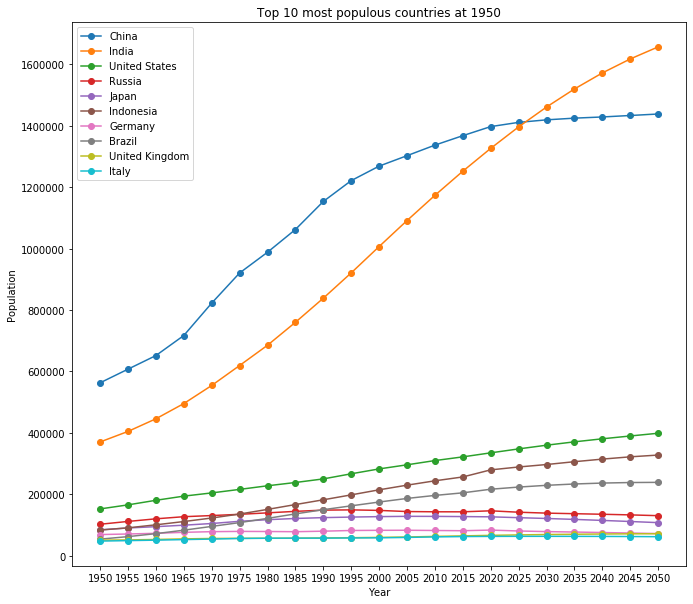

In [210]:
# Plot graph 
# Set size
fig = plt.figure(figsize=(11,10))
ax1 = fig.add_subplot(111)

# Set maker
ax1.plot(to_plot, marker = 'o')

# Set title
ax1.set_title('Top 10 most populous countries at 1950')

# Set columns label
ax1.set_ylabel('Population')

# Set Row label
ax1.set_xlabel('Year')

# Graph
ax1.legend(to_plot)

In [211]:
# Average annual growth
top_10_AAG = df.iloc[df['1950'].sort_values(ascending = False)[1:11].index]

# Set index to Country
top_10_AAG.set_index('Country', inplace = True)

In [212]:
# Track top 10 average annual growth from 1955 to 2050
# Get average annual growth for each year
top_10_AAG_yr = top_10_AAG[['1955AAG', '1960AAG', '1965AAG','1970AAG','1975AAG', '1980AAG','1985AAG',
                            '1990AAG','1995AAG', '2000AAG', '2005AAG','2010AAG', '2015AAG', '2020AAG',
                            '2025AAG','2030AAG', '2035AAG', '2040AAG', '2045AAG', '2050AAG']]
# Erase the AAG at the end of each year
top_10_AAG_yr.columns = ['1955', '1960', '1965','1970','1975', '1980','1985', '1990','1995', '2000',
                        '2005','2010', '2015', '2020', '2025','2030', '2035', '2040', '2045', '2050']

# Convert for plot
AAG_plot = top_10_AAG_yr.T

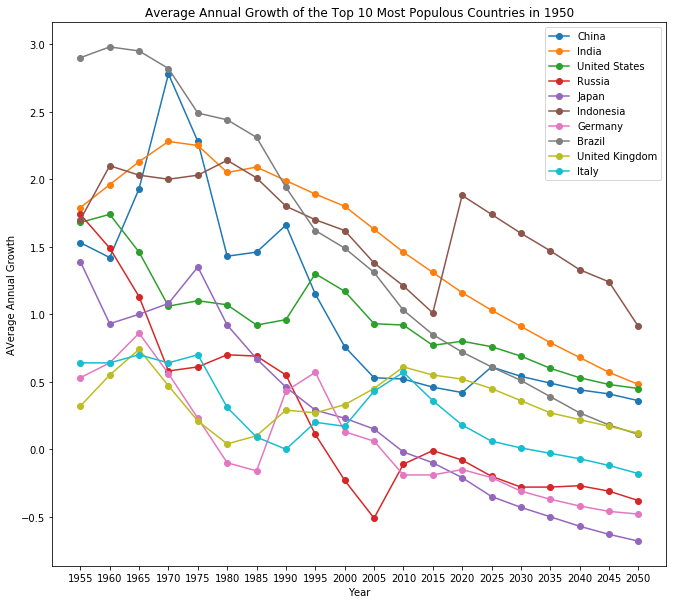

In [214]:
# Graph
# Set size
fig = plt.figure(figsize=(11,10))
axis2 = fig.add_subplot(111)

# Set maker
axis2.plot(AAG_plot, marker = 'o')

# Set title
axis2.set_title('Average Annual Growth of the Top 10 Most Populous Countries in 1950')

# Set columns label
axis2.set_ylabel('AVerage Annual Growth')

# Set row label
axis2.set_xlabel('Year')

# Graph
axis2.legend(AAG_plot)

#### Question 2:
The file `nobelprize-laureate.json` is a JSON file containing the information about Nobel Prize laureates. Create a Pandas DataFrame from the JSON file and complete the following steps:
- Answer the question: How many unique countries are listed in this dataset as the Nobel Prize laureates's birth countries?
- Plot the top-20 birth countries in a bar chart showing the country names and the number of laureats born in the countries.
- Starting from 1901 to the latest year in the dataset, extract the birth countries of the laureates at each year. Plot a bar chart showing the number of unique birth countries of the laureates over the years.
![](https://i.imgur.com/1i84fS5.png)

In [20]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

In [5]:
import json

# Reads the json file
laureate_json = json.load(open('nobelprize-laureate.json'))

In [6]:
# How many countries does this data set represent as the Nobel Prize laureates's birth countries?

# Number of laureates born in the countries
laureate_df = pd.DataFrame(laureate_json["laureates"])

# Number of prize
prize_df = pd.DataFrame([rec['prizes'][0] for rec in laureate_json['laureates']])

# Number of year
year_df = pd.concat([laureate_df, prize_df], axis = 1)

# Display toal number of countries
print("The number of countries represents as the Nobel Prize laureates's birth countries is: " + str(year_df.bornCountry.nunique()))

The number of countries represents as the Nobel Prize laureates's birth countries is: 121


In [7]:
# Display top 20 countries
top20 = year_df.bornCountry.value_counts().head(20)
top20

USA                     263
United Kingdom           83
Germany                  63
France                   51
Sweden                   29
Japan                    25
the Netherlands          18
Canada                   18
Russia                   17
Switzerland              17
Italy                    17
Austria                  14
Norway                   12
China                    11
Denmark                  11
Scotland                 11
Australia                10
South Africa              9
Belgium                   9
Germany (now Poland)      8
Name: bornCountry, dtype: int64

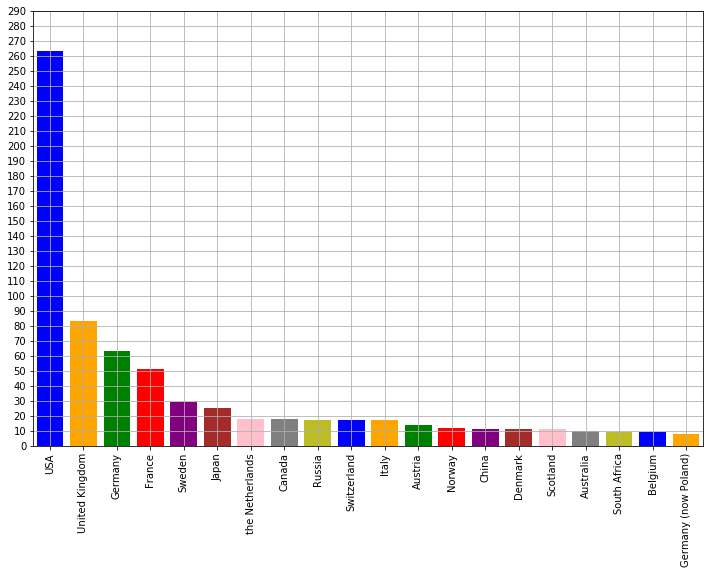

In [74]:
# Plot graph
import numpy as np
# Get data
laureate_df = pd.DataFrame(laureate_json['laureates'])

# Extract prize and assign to prize_df
prize_df = pd.DataFrame([rec['prizes'][0] for rec in laureate_json['laureates']])

# Add info to laureate dataframe
laureate_year_df = pd.concat([laureate_df, prize_df], axis = 1)
laureate_year_df.head()
countries = laureate_year_df['bornCountry']
ax3 = countries.value_counts()[:20].plot.bar(figsize=(12, 8))

# Set color
ax3.bar(top_20_sorted.country.sort_values(), 
          top_20_sorted.laureates.sort_values(ascending=False), 
          color=['blue','orange','green', 'red', 'purple', 'brown','pink','grey', '#bcbd24'])
ax3.set_yticks(np.arange(0, 300, 10))
ax3.grid()

In [45]:
# Plot a bar chart showing the number of unique birth countries of the laureates over the years
# Get data
laureate_df = pd.DataFrame(laureate_json['laureates'])

# Extract oruze and assign to prize_df
prize_df = pd.DataFrame([rec['prizes'][0] for rec in laureate_json['laureates']])

# Add year from prize_df to laureate dataframe
year_df = pd.concat([laureate_df, prize_df['year']], axis = 1)

# Create new dataframe with bornCountry and year only
country_year = pd.DataFrame(laureate_year_df[['bornCountry','year']])


In [47]:
# Create list from 1901-2017
each_year = country_year.year.unique()

# Remove all nan values
clear_values = [x for x in each_year if str(x) != 'nan']

# Create group and group or index by year
grouped = country_year.groupby('year')

In [73]:
# Create dictonary contain organized list with list of zero 
laureate = dict(zip(clear_values, [0]*len(clear_values)))

for key in clear_values:
    # Save the unique birthcountries by the key which is year
    laureate[key] = [len(grouped.get_group(key).
                         bornCountry.unique())]
    
# Convert to a dataframe for plotting     
plot_df = pd.DataFrame.from_dict(laureate,orient='index')

# Flatten list for plotting
column_values = [item for sublist in plot_df.values for item in sublist]

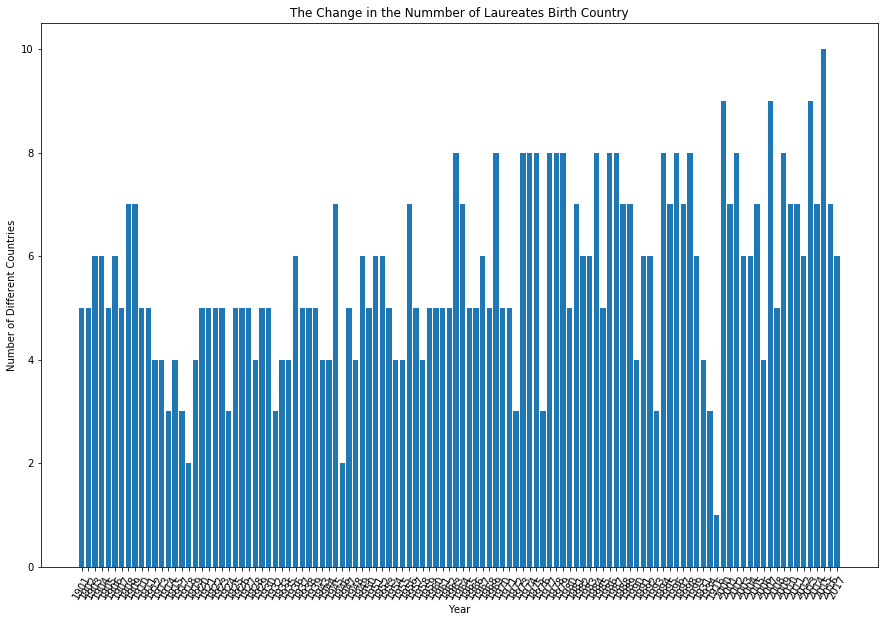

In [96]:
# Plot graph
# Set size
fig = plt.figure(figsize=(15,10))
ax4 = fig.add_subplot(111)
ax4.bar(plot_df.index, column_values)

# Set title
ax4.set_title('The Change in the Nummber of Laureates Birth Country')

# Set column label
ax4.set_ylabel('Number of Different Countries')

# Set row label
ax4.set_xlabel('Year')
ax4.tick_params(axis='x', labelrotation=60)
